In [3]:
#dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from xgboost import XGBClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns

In [4]:
#loading data
df = pd.read_csv('indian_liver_patient.csv')
df.head(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [5]:
#missing value checking
df.isnull().values.any()

True

In [6]:
#number of row and column
df.shape

(583, 11)

In [7]:
#target column having healthy(2) and unhealthy(1)
df['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

C:\Users\User\anaconda3\envs\tf\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Dataset', ylabel='count'>

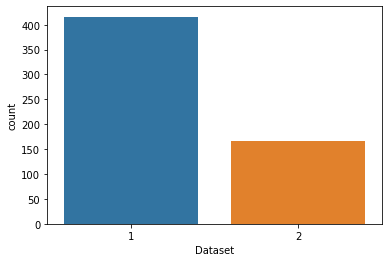

In [8]:
#visualize the count
sns.countplot(df['Dataset'])

In [9]:
#My own calculations
#percent_dont_have_disease = 48/(147+48)*100
#percent_has_disease = 147/(147+48)*100
#print('Guess for not having Parkinsons disease, I would be correct',percent_dont_have_disease,'% of the time.')
#print('Guess for having Parkinsons disease, I would be correct',percent_has_disease,'% of the time.')

In [10]:
#know the datatypes
df.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [11]:
#create the feature dataset
x = df.drop(['Age','Gender'],1)
x = np.array(x.drop(['Dataset'],1))
#create the target dataset
y = np.array(df['Dataset'])

array([[7.00e-01, 1.00e-01, 1.87e+02, ..., 6.80e+00, 3.30e+00, 9.00e-01],
       [1.09e+01, 5.50e+00, 6.99e+02, ..., 7.50e+00, 3.20e+00, 7.40e-01],
       [7.30e+00, 4.10e+00, 4.90e+02, ..., 7.00e+00, 3.30e+00, 8.90e-01],
       ...,
       [8.00e-01, 2.00e-01, 2.45e+02, ..., 6.40e+00, 3.20e+00, 1.00e+00],
       [1.30e+00, 5.00e-01, 1.84e+02, ..., 6.80e+00, 3.40e+00, 1.00e+00],
       [1.00e+00, 3.00e-01, 2.16e+02, ..., 7.30e+00, 4.40e+00, 1.50e+00]])

In [70]:
#split the data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [71]:
#transform the feature data to be values between 0 and 1
sc = MinMaxScaler(feature_range = (0,1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [72]:
#XGBoosting classifier
model = XGBClassifier().fit(x_train, y_train)

In [80]:
#model predictions
predictions = model.predict(x_test)
#predictions = [1 if y>=0.5 else 0 for y in predictions]
#predictions

print('Original: {0}'.format(",".join(str(x) for x in y_test)))
print('Predicted: {0}'.format(",".join(str(x) for x in predictions)))

Original: 1,1,2,1,2,1,1,1,1,2,1,1,1,1,1,1,1,2,1,1,2,1,2,1,1,1,1,1,1,2,1,1,1,2,1,1,1,1,1,2,1,1,1,2,1,2,1,1,2,1,2,1,2,1,1,2,1,1,1,1,2,1,2,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,1,2,1,1,2,2,2,2,1,2,1,2,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,2,1,1,1,1,2,1,2,1
Predicted: 2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,2,1,1,2,1,1,2,2,1,1,1,1,1,1,1,1,2,1,1,2,1,1,1,1,1,2,2,1,1,1,1,2,2,2,1,1,1,2,1,1,1,1,2,1,1,2,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,2,1,1,1,2,1,1,2,1,2,2,1,1,2,1,2,1,1,1,1,1,2,1,1,1,1,1,1,1


In [81]:
#y_test

In [82]:
#Shape of training and testing data
print('shape of train data:', x_train.shape)
print('shape of test data:', x_test.shape)

shape of train data: (466, 8)
shape of test data: (117, 8)


In [83]:
#models accuracy, precision, recall, F1-score
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.77      0.80      0.78        86
           2       0.37      0.32      0.34        31

    accuracy                           0.68       117
   macro avg       0.57      0.56      0.56       117
weighted avg       0.66      0.68      0.67       117

